In [2]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

## Audio File

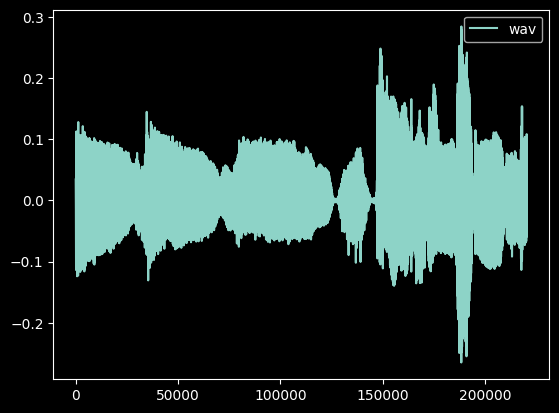

In [3]:
AUDIO_PATH = './test.wav'
wav, sr = sf.read(AUDIO_PATH)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## Stereo Chorus

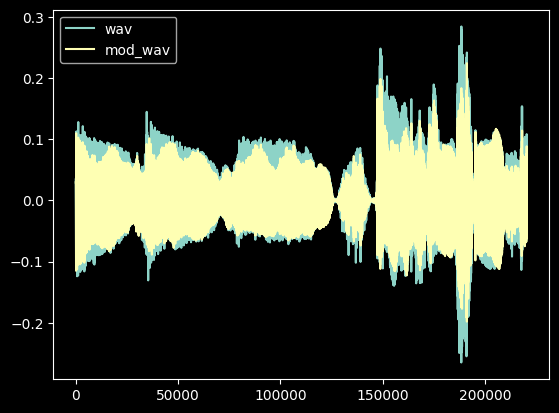

In [4]:
from diffFx_pytorch.processors.modulation import StereoChorus      
DSP_PARAMS = {
    'delay_ms': 5.0,    # Base delay
    'rate': 1.5,        # Modulation rate
    'depth': 0.15,      # Moderate detuning
    'mix': 0.7,         # Mostly wet
    'g0': 1.0,          # Full voice 1
    'pan0': -0.7,       # Voice 1 left
    'g1': 0.8,          # Reduced voice 2
    'pan1': 0.7         # Voice 2 right
}

Processor = StereoChorus(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
test_wav_stereo = torch.cat([test_wav, test_wav], dim=1)
mod_wav = Processor(test_wav, None, DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=mod_wav.squeeze().cpu().numpy(), rate=sr, normalize=True))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(mod_wav.squeeze()[0, ...].cpu().numpy(),      label='mod_wav')
plt.legend()